# Make figures for paper "The rise and fall of rationality in language"
PNAS 2021

By Marten Scheffer, Ingrid van de Leemput, Els Weinans and Johan Bollen

# Settings and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as st

mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams["font.family"] = "arial"
plt.rcParams.update({'font.size': 12})
from cycler import cycler
import seaborn as sns
import pickle
# create a scaler object
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()

from matplotlib.ticker import MaxNLocator
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter

# alphabet for plotting
alfabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [2]:
# different corpora we are using
corpora = ['eng_all', 'eng_fic','eng_excl_fic',
           'eng_am','ger', 'sp', 
           'eng_all_2009', 'eng_fic_2009','eng_excl_fic_2009',
           'NYT',
           'GT_eng_all', 'GT_eng_am', 'GT_ger', 'GT_sp'
          ]
languages = ['eng', 'eng', 'eng', 
             'eng', 'ger', 'sp', 
             'eng', 'eng', 'eng',
             'eng',
             'eng', 'eng', 'ger', 'sp']
titles = ['English All','English Fiction','English excl Fiction',
          'American English','German','Spanish', 
          'English All 2009','English Fiction 2009','English excl Fiction 2009',
          'NYT',
          'GT English All', 'GT American English', 'GT German', 'GT Spanish']
categories = pd.DataFrame(
    {'corpora': corpora,
     'lan': languages,
     'title': titles})
lans_unique = categories['lan'].unique()
categories = categories.set_index('corpora')
categories

,lan,title
corpora,,
eng_all,eng,English All
eng_fic,eng,English Fiction
eng_excl_fic,eng,English excl Fiction
eng_am,eng,American English
ger,ger,German
sp,sp,Spanish
eng_all_2009,eng,English All 2009
eng_fic_2009,eng,English Fiction 2009
eng_excl_fic_2009,eng,English excl Fiction 2009


### Flag words per language

#### Flag words Personal (in script S1), Intuition, and examples

In [3]:
S1 = dict(eng = {'belief' : ['spirit', 'imagine', 'wisdom', 'wise', 'hunch', 'mind', 'suspicion', 'believe', 'think',
                             'trust', 'faith', 'truth', 'true', 'belief', 'doubt', 'hope', 'fear', 'life', 'soul',
                             'heaven', 'eternal', 'mortal', 'holy', 'god', 'pray', 'mystery'],
                 'senses': ['sense', 'sensation', 'feel', 'soft', 'hard', 'cold', 'hot', 'smell', 'foul', 'taste',
                      'sweet', 'bitter', 'hear', 'sound', 'silence', 'loud', 'see', 'gaze', 'glimpse', 'light',
                      'dark', 'bright'],
                 'body':['head', 'nose', 'mouth', 'ear', 'hair', 'shoulder', 'chest', 'belly', 'leg',  'hand', 
                   'arm', 'toe', 'finger'],
                 'pronouns': ['i', 'we', 'you', 'he', 'she', 'they', 'mine', 'your', 'her', 'his', 'our', 'their' ],
                 'activities': ['walk', 'sleep',  'shout', 'sit', 'laugh', 'eat', 'drink', 'smile']},
          ger = {'belief': ['geist', 'erträumen', 'weisheit', 'ahnung', 'verstand', 'misstraue', 'denke', 'vertrauen', 
                            'glaube', 'wahrheit', 'zweifel', 'hoffnung', 'angst', 'leben', 'seele', 'himmel', 'ewig', 
                            'sterblich', 'heilig','gott', 'beten', 'übernatürlich', 'geheimnisvoll', 'weise'],
                 'senses': ['gefühl', 'weich', 'hart', 'kalt', 'heiß', 'geruch', 'übel', 'geschmack', 'süß', 'bitter',
                            'hören', 'ton', 'stille', 'laut', 'sehen', 'blicken', 'licht', 'dunkel', 'hell'],
                 'body': ['kopf', 'nase', 'mund', 'ohr', 'haare', 'schulter', 'brust', 'bauch', 'bein',  'hand',
                          'arm', 'zehe', 'finger'],
                 'pronouns=': ['ich', 'wir', 'du', 'er', 'sie', 'mein', 'dein', 'sein', 'ihr', 'unser', 'ihre' ], 
                 'activities': ['laufen', 'schlafen', 'schreien', 'sitzen', 'lachen', 'essen', 'trinken', 
                                     'lächeln']},
          sp = {'belief': ['espíritu', 'imaginar', 'sabiduría', 'sabio', 'corazonada', 'mente', 'sospecha', 
                           'creer', 'pensar', 'confiar', 'fe', 'verdad', 'creencia', 'duda', 'esperanza',
                           'miedo', 'vida', 'alma', 'cielo', 'eterno', 'mortal', 'santo', 'dios', 'orar',
                           'sobrenatural', 'misterio', 'sabio'],
                'senses': ['sentido', 'sensación', 'sentir', 'suave', 'duro', 'frío', 'caliente', 'oler', 'asqueroso',
                           'gusto', 'dulce', 'amargo', 'oír', 'sonar', 'silencio', 'fuerte', 'ver', 'mirar', 
                           'vislumbrar','ligero', 'oscuro', 'brillante'],
                'body':['cabeza', 'nariz', 'boca', 'oreja', 'cabello', 'hombro', 'pecho', 'vientre', 'pierna', 
                        'mano', 'brazo', 'dedo'],
                'pronouns': ['yo', 'nosotros', 'tú', 'él', 'ella', 'ellos', 'mío', 'tu', 'nuestro', 'su' ],
                'activities': ['caminar', 'dormir', 'gritar', 'sentarse', 'reír', 'comer', 'beber', 'sonreír']})

examples_S1={}
examples_S1['eng']= ['imagine', 'wisdom', 'mind', 'think', 'believe', 'truth', 'feel', 'sense']

S1_words ={}
Intuition={}
for lan in lans_unique:
    Intuition[lan] = S1[lan]['belief'] + S1[lan]['senses']
    S1_words[lan] = [word for cat in S1[lan] for word in S1[lan][cat]]


#### Flag words Societal (in script S2), Rational, and Examples

In [4]:
S2= dict(eng = {'science': ['science', 'technology', 'scientific', 'chemistry', 'chemicals', 'physics', 'medicine',
                 'uncertainty', 'model', 'methodology', 'method', 'fact', 'data', 'hypothesis', 'statistics',
                 'math', 'analysis', 'conclusion', 'replication', 'limit', 'result', 'determine', 'transmission',
                 'assuming', 'system'],
                'quantification': ['size', 'unit', 'pressure', 'area', 'density', 'percent'],
                'business': ['business', 'company', 'payment', 'expenses', 'manager', 'profit', 'investment', 
                             'labour', 'revenue', 'market', 'employee'],
                'social': ['ministry', 'commission', 'lawyer', 'government', 'law', 'nation', 'community', 
                           'administration', 'municipality', 'education', 'city', 'agreement', 'health', 
                           'policy', 'central'],
                'timeplace': ['year', 'month', 'week', 'january', 'july', 'december', 'monday', 'friday','country', 
                   'state', 'city']},
         ger = {'science': ['wissenschaft', 'technologie', 'chemie', 'physik', 'medizin', 'unsicherheit', 
                            'modell', 'methodik', 'methode', 'tatsache', 'daten', 'hypothese', 'statistik', 
                            'mathematik', 'analyse', 'auslegung', 'replikation', 'grenze', 'ergebnis', 
                            'bestimmen', 'übertragung', 'annahme', 'system' ],
                'quantification': ['größe', 'einheit', 'druck', 'fläche', 'dichte', 'prozent'],
                'business':['business', 'unternehmen', 'zahlung', 'ausgaben', 'manager', 'gewinn', 'investition', 
                            'arbeit','einnahmen', 'markt', 'mitarbeiter'],
                'social':['ministerium', 'kommission','rechtsanwalt', 'regierung', 'gesetz', 'nation', 'gemeinde', 
                          'verwaltung', 'bildung', 'stadt', 'vereinbarung', 'gesundheit', 'politik', 'zentral'],
                'timeplace': ['jahr', 'monat', 'woche', 'januar', 'juli', 'dezember', 'montag', 'freitag',
                              'land', 'stadt']},
         sp = {'science': ['ciencia', 'tecnología', 'científico', 'química', 'productos', 'químicos', 'física',
                           'medicina', 'inseguridad', 'modelo', 'metodología', 'método', 'dato', 'datos', 
                           'hipótesis', 'estadísticas', 'cálculo', 'análisis', 'conclusión', 'replicación', 
                           'límite', 'resultado', 'determinar', 'transmisión', 'asumiendo', 'sistema'],
               'quantification':['tamaño', 'unidad', 'presión', 'área', 'densidad', 'porcentaje'],
               'business': ['comercio', 'empresa', 'pago', 'gastos', 'gerente', 'beneficio', 'inversión', 
                            'trabajo', 'ingresos', 'mercado', 'trabajadores' ],
               'social':['ministerio', 'comité', 'jurista', 'gobierno', 'ley', 'nación', 'comunidad', 
                         'administración', 'municipio', 'educación', 'ciudad', 'acuerdo', 'salud', 'política', 
                         'central'],
               'timeplace': ['año', 'mes', 'semana', 'enero', 'julio', 'diciembre', 'lunes', 'viernes', 'país',
                   'ciudad', 'estado']})

examples_S2={}
examples_S2['eng']= ['analysis', 'data', 'limit', 'result', 'determine', 'system', 'size', 'percent']

Rationality={}
S2_words ={}
for lan in lans_unique:
    Rationality[lan] = S2[lan]['science'] + S2[lan]['quantification']
    S2_words[lan] = [word for cat in S2[lan] for word in S2[lan][cat]]


In [5]:
"""
# print all word categories and flag words to copy to text
print("Personal flag words")
for lan in languages:
    print(lan + '\n')
    for cat in S1[lan].keys():
        print(cat)
        print(*S1[lan][cat], sep=", ")
        print('\n')


# Print all categories and words to copy-paste into text
print("Societal flag words")
for lan in languages:
    print(lan + '\n')
    for cat in S2[lan].keys():
        print(cat)
        print(*S2[lan][cat], sep=", ")
        print('\n')
"""

'\n# print all word categories and flag words to copy to text\nprint("Personal flag words")\nfor lan in languages:\n    print(lan + \'\n\')\n    for cat in S1[lan].keys():\n        print(cat)\n        print(*S1[lan][cat], sep=", ")\n        print(\'\n\')\n\n\n# Print all categories and words to copy-paste into text\nprint("Societal flag words")\nfor lan in languages:\n    print(lan + \'\n\')\n    for cat in S2[lan].keys():\n        print(cat)\n        print(*S2[lan][cat], sep=", ")\n        print(\'\n\')\n'

### Import 5000 most frequent words in three languagues

In [6]:
allwords= pd.read_pickle('most_frequent_words/most_frequent_words.pkl')

### Import data, including ngrams, NYT, and GT

In [7]:
# import datasets
ts = pd.read_pickle('ts_all.pkl')
tssent = pd.read_pickle('tssent_all.pkl')
tsPCA = pd.read_pickle('ngrams5000_tsPCA.pkl')
wordPCA = pd.read_pickle('ngrams5000_wordPCA.pkl')
PCA_expl_var = pd.read_pickle('ngrams5000_PCA_expl_var.pkl')

#### Some checks 

In [8]:
# check if all retrieved ngrams are in allwords
# Only for NYT, we have a selection of words, because it was difficult to retrieve
for corpus, row in categories.iterrows():
    if corpus != 'NYT':
        lan=row.lan
        print('Corpus: ', row.title)
        print('nr of words in corpus:', len(ts[corpus, 'z'].columns))
        # Check how many words of df in allwords: 
        #words_in_list = [word for word in ts[cat, 'z'].columns if word in allwords[lan]]
        words_not_in_allwords = [word for word in ts[corpus, 'z'].columns if word not in allwords[lan]]
        print('nr of words in all words:',len(allwords[lan]))
        print('words in ngrams, but not in allwords', words_not_in_allwords)
        words_not_in_ngrams = [word for word in allwords[lan] if word not in ts[corpus, 'z'].columns]
        print('words in allwords, but not in ngrams', words_not_in_ngrams)

Corpus:  English All
nr of words in corpus: 4995
nr of words in all words: 5000
words in ngrams, but not in allwords []
words in allwords, but not in ngrams ['an', 'war', 'date', 'madman', 'gravy']
Corpus:  English Fiction
nr of words in corpus: 4995
nr of words in all words: 5000
words in ngrams, but not in allwords []
words in allwords, but not in ngrams ['an', 'war', 'date', 'madman', 'gravy']
Corpus:  English excl Fiction
nr of words in corpus: 4995
nr of words in all words: 5000
words in ngrams, but not in allwords []
words in allwords, but not in ngrams ['an', 'war', 'date', 'madman', 'gravy']
Corpus:  American English
nr of words in corpus: 4995
nr of words in all words: 5000
words in ngrams, but not in allwords []
words in allwords, but not in ngrams ['an', 'war', 'date', 'madman', 'gravy']
Corpus:  German
nr of words in corpus: 4231
nr of words in all words: 4240
words in ngrams, but not in allwords []
words in allwords, but not in ngrams ['ein', 'krieg', "stimmt's", "halt's",

In [9]:
# check if all flag words are in frequency lists NYT
lan = 'eng' 
print('nr of words in NYT word list:', len(ts['NYT','z'].columns))
# Check how many words of df in S1 flagwords: 
words_not_in_NYT = [word for word in S1_words[lan] if word not in ts['NYT','z'].columns]
print('nr of words in S1 flag words:', len(S1_words[lan]))
print('words NYT not in S1 flag words:', words_not_in_NYT)
# Check how many words of df in S2 flagwords: 
words_not_in_NYT = [word for word in S2_words[lan] if word not in ts['NYT','z'].columns]
print('nr of words in S2 flag words:', len(S2_words[lan]))
print('words NYT not in S2 flag words:', words_not_in_NYT)

nr of words in NYT word list: 166
nr of words in S1 flag words: 81
words NYT not in S1 flag words: []
nr of words in S2 flag words: 68
words NYT not in S2 flag words: []


# Figures and Tables 

## PCA, Sentiment, intuition words, and rationality words
Define function to plot dynamics of PCA, sentiment, intuition, and rationality words

In [10]:
def plot_PC_sent_S1S2words(section, method, categories, languages, PC_plot, PC_dir, titles):
    row_titles = titles
    frows=len(row_titles)
    col_titles = ['Principal Component', 'Sentiment', 'Intuition related words', 'Rationality related words']
    fcols=4

    fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,6*frows), sharex=True)

    # Plot relevant Principal component
    for i, (cat, lan, PCaxis, PCdir) in enumerate(zip(categories, languages, PC_plot, PC_dir)):
        axs[i, 0].plot(tsPCA[cat, method][PCaxis]*PCdir, '-k', linewidth=1.5)
        axs[i, 0].axes.yaxis.set_ticks([])
        axs[i, 0].set_xlabel('year')

    # Plot sentiment
    for i, (cat, lan) in enumerate(zip(categories, languages)):
        axs[i, 1].plot(tssent[cat, method]['sent_pos'], color='dodgerblue', linewidth=1.5)
        axs[i, 1].axes.yaxis.set_ticks([])
        axs[i, 1].set_xlabel('year')
        ax2=axs[i, 1].twinx()
        ax2.axes.yaxis.set_ticks([])
        ax2.plot(tssent[cat, method]['sent_neg'], color='red', linewidth=1.5)
        ax3=axs[i, 1].twinx()
        ax3.plot(tssent[cat, method]['sent_aro'], color='black', linewidth=1.5)
        ax3.axes.yaxis.set_ticks([])

    # Plot intuition related words
    for i, (cat, lan) in enumerate(zip(categories, languages)):
            # subset S 
            S= Intuition[lan]
            Swords_inlist = [word for word in S if word in ts[cat,method].columns]
            Swords_not_used= [word for word in S if word not in ts[cat,method].columns]
            print('Intuition words used from subset:', lan)
            print(*Swords_inlist, sep = ", ")
            print('\n')
            ts_subset=ts[cat,method][Swords_inlist]
            # re-order and plot confidence intervals
            ts_subset2=ts_subset.stack(0)
            ts_subset2.name = 'freq'
            ts_subset2=ts_subset2.reset_index()
            sns.lineplot(ax=axs[i, 2], data=ts_subset2, x="date", y="freq", ci=95, color='black') #, color='orangered'
            axs[i, 2].axes.yaxis.set_ticks([])
            axs[i, 2].set_xlabel('year')
            axs[i, 2].set(ylabel=None)

    # Plot rationality related words
    for i, (cat, lan) in enumerate(zip(categories, languages)):
            # subset S 
            S= Rationality[lan]
            Swords_inlist = [word for word in S if word in ts[cat,method].columns]
            Swords_not_used= [word for word in S if word not in ts[cat,method].columns]
            print('Rationality words used from subset:', lan)
            print(*Swords_inlist, sep = ", ")
            print('\n')
            ts_subset=ts[cat,method][Swords_inlist]
            # re-order and plot confidence intervals
            ts_subset2=ts_subset.stack(0)
            ts_subset2.name = 'freq'
            ts_subset2=ts_subset2.reset_index()
            sns.lineplot(ax=axs[i, 3], data=ts_subset2, x="date", y="freq", ci=95, color='black') #, color='orangered'
            axs[i, 3].axes.yaxis.set_ticks([])
            axs[i, 2].set_xlabel('year')
            axs[i, 3].set(ylabel=None)

    # set titles to columns and rows
    pad = 10 # in points
    for ax, col in zip(axs[0], col_titles):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='center', va='baseline')
    for ax, row in zip(axs[:,0], row_titles):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    fontsize=18, ha='right', va='center')

    # set A, B, C etc to subplots
    i=0
    for ax1 in axs:
        for ax in ax1:
            ax.annotate(alfabet[i], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=20, ha='left', va='top')
            i=i+1

    # place plots next to each other
    fig.subplots_adjust(hspace=0)
    fig.subplots_adjust(wspace=0)
    # rotate x-axis ticks
    fig.autofmt_xdate(rotation=-90)
    plt.savefig(section+'PCA_sent_'+'_'.join(corpora_plot)+'.pdf', format='pdf', bbox_inches='tight')
    plt.savefig(section+'PCA_sent_'+'_'.join(corpora_plot)+'.png', format='png', bbox_inches='tight')


### Figure 1 - main text

Intuition words used from subset: eng
spirit, imagine, wisdom, wise, hunch, mind, suspicion, believe, think, trust, faith, truth, true, belief, doubt, hope, fear, life, soul, heaven, eternal, mortal, holy, god, pray, mystery, sense, feel, soft, hard, cold, hot, smell, foul, taste, sweet, bitter, hear, sound, silence, loud, see, light, dark, bright


Intuition words used from subset: sp
espíritu, imaginar, sabiduría, mente, sospecha, creer, pensar, fe, verdad, duda, esperanza, miedo, vida, alma, cielo, santo, dios, misterio, sentido, sensación, sentir, suave, duro, frío, caliente, gusto, dulce, oír, silencio, fuerte, ver, mirar, oscuro, brillante


Intuition words used from subset: eng
spirit, imagine, wisdom, wise, hunch, mind, suspicion, believe, think, trust, faith, truth, true, belief, doubt, hope, fear, life, soul, heaven, eternal, mortal, holy, god, pray, mystery, sense, feel, soft, hard, cold, hot, smell, foul, taste, sweet, bitter, hear, sound, silence, loud, see, light, dark, b

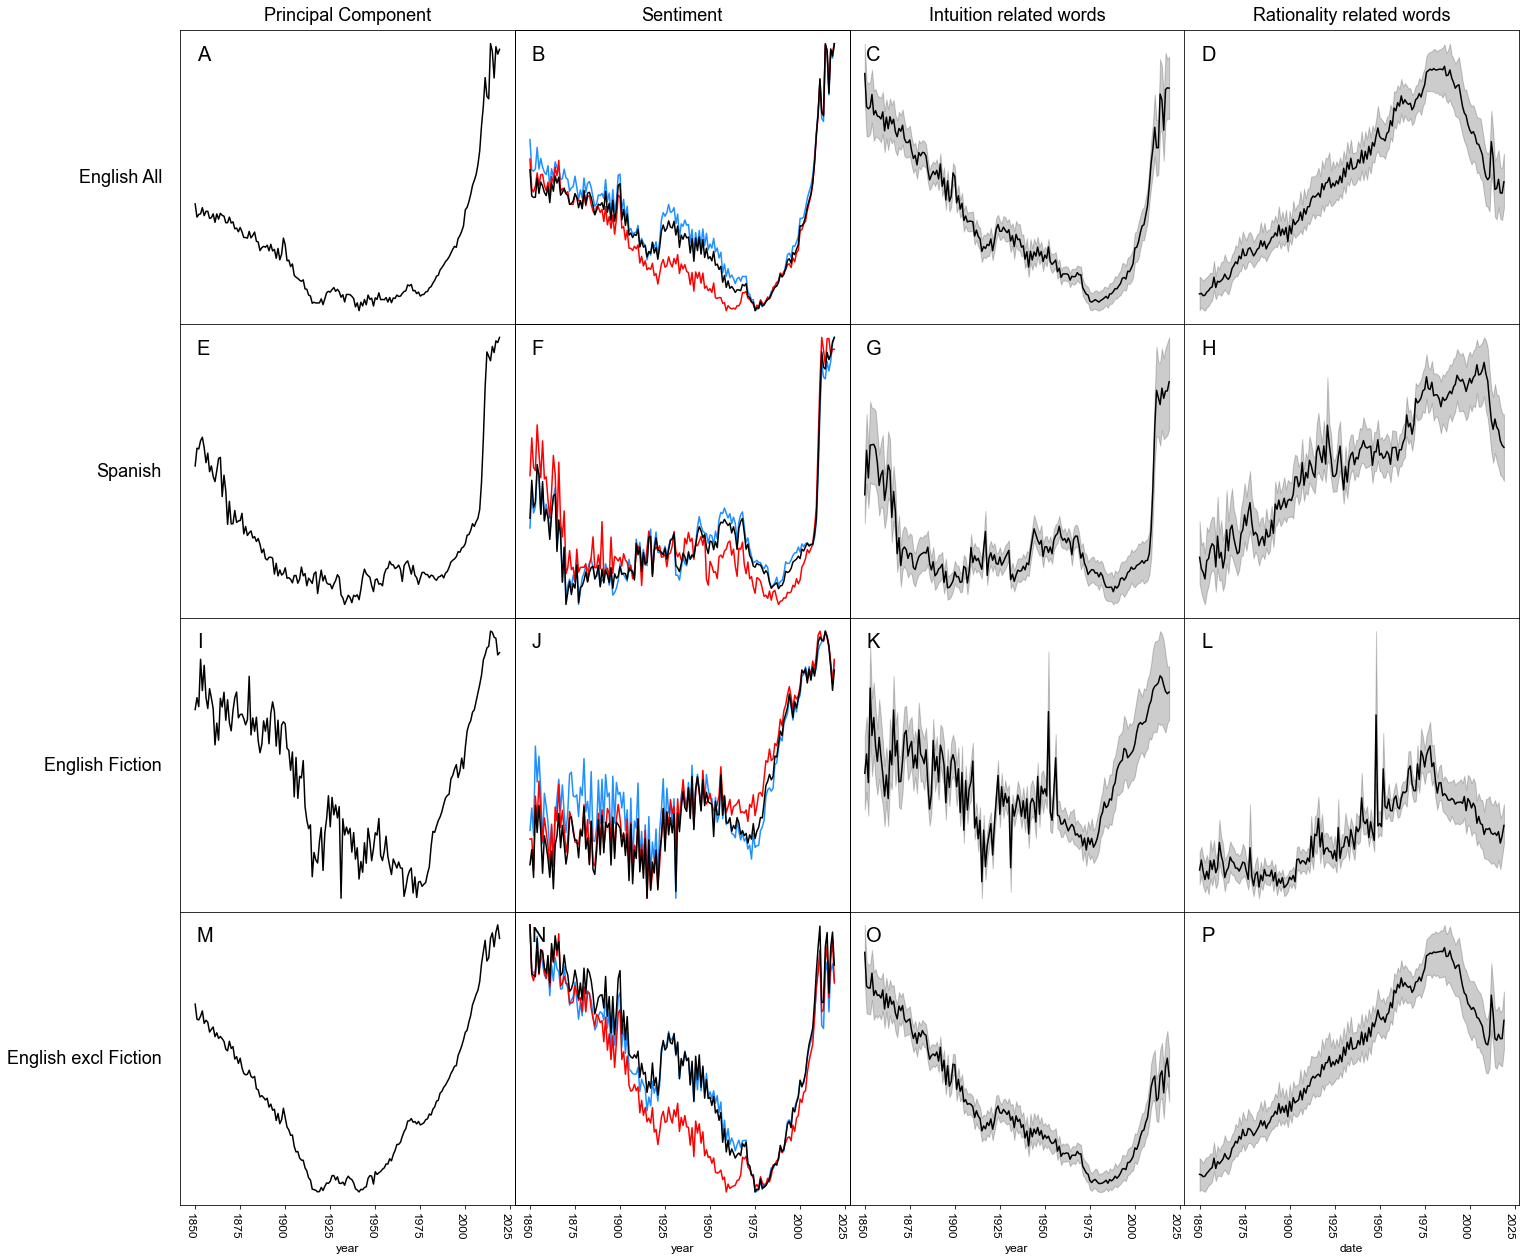

In [11]:
section = 'Figures/main/'
method = 'z'
corpora_plot = ['eng_all','sp', 'eng_fic', 'eng_excl_fic']
PC_plot=['PC2', 'PC2', 'PC2', 'PC2']
PC_dir = [1,1,1,1]
plot_PC_sent_S1S2words(section, method, corpora_plot, categories['lan'][corpora_plot].tolist(), PC_plot, PC_dir, categories['title'][corpora_plot].tolist())

### 2009 data

Intuition words used from subset: eng
spirit, imagine, wisdom, wise, hunch, mind, suspicion, believe, think, trust, faith, truth, true, belief, doubt, hope, fear, life, soul, heaven, eternal, mortal, holy, god, pray, mystery, sense, feel, soft, hard, cold, hot, smell, foul, taste, sweet, bitter, hear, sound, silence, loud, see, light, dark, bright


Intuition words used from subset: eng
spirit, imagine, wisdom, wise, hunch, mind, suspicion, believe, think, trust, faith, truth, true, belief, doubt, hope, fear, life, soul, heaven, eternal, mortal, holy, god, pray, mystery, sense, feel, soft, hard, cold, hot, smell, foul, taste, sweet, bitter, hear, sound, silence, loud, see, light, dark, bright


Intuition words used from subset: eng
spirit, imagine, wisdom, wise, hunch, mind, suspicion, believe, think, trust, faith, truth, true, belief, doubt, hope, fear, life, soul, heaven, eternal, mortal, holy, god, pray, mystery, sense, feel, soft, hard, cold, hot, smell, foul, taste, sweet, bitter,

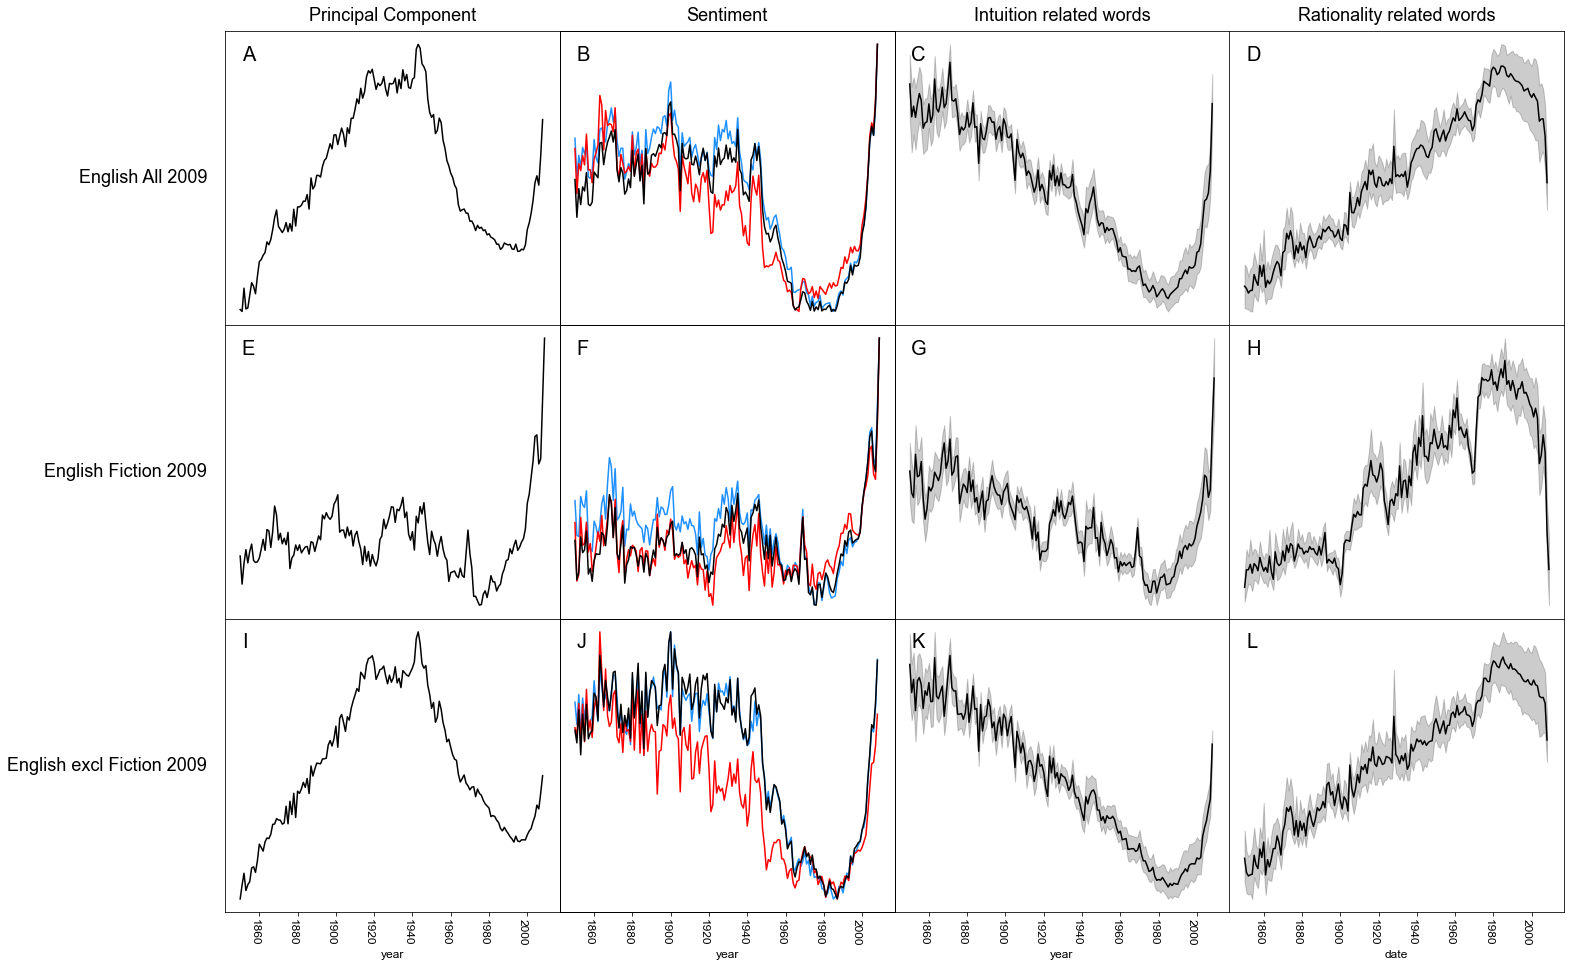

In [12]:
section = 'Figures/SI/'
method = 'z'
corpora_plot = ['eng_all_2009', 'eng_fic_2009', 'eng_excl_fic_2009']
PC_plot=['PC2', 'PC2', 'PC2']
PC_dir = [-1,1,-1]
plot_PC_sent_S1S2words(section, method, corpora_plot, categories['lan'][corpora_plot].tolist(), PC_plot, PC_dir, categories['title'][corpora_plot].tolist())

## Ratio personal singular/plural

### plot singular vs plural pronouns

In [13]:
def plot_diff_sing_plur_pronouns(section, method, corpora_plot):
    minmax_scaler = MinMaxScaler()
    frows = len(corpora_plot)
    fcols = 1
    fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,4*frows), sharex=True)
    data=ts
    axi=0
    for corpus in corpora_plot:
        lan = categories['lan'][corpus]
        # Ratio singular vs plural pronouns
        if method == 'z':
            # Calculate z-score for he + she, and for her + his
            if lan == 'eng':
                heshe=data[corpus,'scaled']['she']+data[corpus, 'scaled']['he']
                heshe_z=(heshe - np.mean(heshe))/np.std(heshe)
                herhis=data[corpus, 'scaled']['her']+data[corpus, 'scaled']['his']
                herhis_z=(herhis - np.mean(herhis))/np.std(herhis)

                ax=axs[axi]
                ax.plot(data[corpus, method]['i'] - data[corpus, method]['we']) 
                ax.plot(data[corpus, method]['my'] - data[corpus, method]['our']) 
                ax.plot(heshe_z - data[corpus,method]['they']) 
                ax.plot(herhis_z - data[corpus, method]['their'])  
                #ax.set_ylabel('difference in z-scores')
                ax.set_xlabel('year', fontsize=14)
                # set title
                pad=10
                ax.annotate(categories['title'][corpus], xy=(0.2, 0.95), xytext=(0, 0),
                            xycoords='axes fraction', textcoords='offset points',
                            fontsize=16, ha='left', va='top')

                # set A, B, C etc to subplots
                ax.annotate(alfabet[axi], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='left', va='top')
                
                ax.legend(['z(\'i\') - z(\'we\')', 
                               'z(\'my\') - z(\'our\')', 
                               'z(\'she\'+ \'he\') - z(\'they\')', 
                               'z(\'her\' + \'his\') - z(\'their\')'], 
                                bbox_to_anchor=(1.05, 0.6), loc='upper left')
                axi=axi+1
            elif lan == 'sp':
                heshe=data[corpus,'scaled']['ella']+data[corpus, 'scaled']['él']
                heshe_z=(heshe - np.mean(heshe))/np.std(heshe)
                herhis=data[corpus, 'scaled']['su']+data[corpus, 'scaled']['sus']
                herhis_z=(herhis - np.mean(herhis))/np.std(herhis)
                they=data[corpus, 'scaled']['ellos']+data[corpus, 'scaled']['ellas']
                they_z=(they - np.mean(they))/np.std(they)

                ax=axs[axi]
                ax.plot(data[corpus,method]['yo'] - data[corpus,method]['nosotros']) 
                ax.plot(data[corpus,method]['mi'] - data[corpus,method]['nuestro']) 
                ax.plot(heshe_z - they_z) 
                # ax.plot(herhis_z - data[cat, method]['their'])  
                # all su, or sus
                # ax.set_ylabel('difference in z-scores')
                ax.set_xlabel('year', fontsize=14)
                # set title
                pad=10
                ax.annotate(categories['title'][corpus], xy=(0.2, 0.95), xytext=(0, 0),
                            xycoords='axes fraction', textcoords='offset points',
                            fontsize=16, ha='left', va='top')

                # set A, B, C etc to subplots
                ax.annotate(alfabet[axi], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='left', va='top')
                
                ax.legend(['z(\'yo\') - z(\'nosotros\')', 
                               'z(\'mi\') - z(\'nuestro\')', 
                               'z(\'ella\'+ \'él\') - z(\'ellas\' + \'ellos\')'], 
                                bbox_to_anchor=(1.05, 0.6), loc='upper left')
                axi=axi+1
            else:
                print('language not known', lan)
            fig.text(-0.03, 0.5, '[z-scores singular pronoun(s)] - [z-scores plural pronoun(s)]', 
                     va='center', rotation='vertical', fontsize = 14, fontweight='light')
        else:
            if lan == 'eng':
                heshe=data[corpus,'scaled']['she']+data[corpus,'scaled']['he']
                herhis=data[corpus,'scaled']['her']+data[corpus,'scaled']['his']

                ax=axs[axi]
                ax.plot(data[corpus,method]['i'] / data[corpus,method]['we']) 
                ax.plot(data[corpus,method]['my'] / data[corpus,method]['our']) 
                ax.plot(heshe / data[corpus,method]['they']) 
                ax.plot(herhis / data[corpus,method]['their'])  
                #ax.set_ylabel('ratio relative frequencies')
                ax.set_xlabel('year', fontsize=14)
                ax.set_yscale('log')
                
                ax.tick_params(axis='y', which='minor')
                ax.yaxis.set_minor_locator(plt.MaxNLocator(5))
                ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
                ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
        
                # set title
                pad=10
                ax.annotate(categories['title'][corpus], xy=(0.4, 0.95), xytext=(0, 0),
                            xycoords='axes fraction', textcoords='offset points',
                            fontsize=16, ha='left', va='top')

                # set A, B, C etc to subplots
                ax.annotate(alfabet[axi], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='left', va='top')
                
                ax.legend(['\'i\'/ \'we\'', 
                               '\'my\' / \'our\'', 
                               '(\'she\'+ \'he\') / \'they\'', 
                               '(\'her\' + \'his\') / \'their\')'], 
                                bbox_to_anchor=(1.05, 0.6), loc='upper left')
                axi=axi+1
            elif lan == 'sp':
                heshe=data[corpus,'scaled']['ella'] + data[corpus, 'scaled']['él']
                #herhis=data[corpus, 'scaled']['su'] + data[corpus, 'scaled']['sus']
                they=data[corpus, 'scaled']['ellos'] + data[corpus, 'scaled']['ellas']

                ax=axs[axi]
                ax.plot(data[corpus, method]['yo'] / data[corpus, method]['nosotros']) 
                ax.plot(data[corpus, method]['mi'] / data[corpus, method]['nuestro']) 
                ax.plot(heshe / they) 
                #ax.plot(herhis_z - data[cat, method]['their'])  
                # all su, or sus
                #ax.set_ylabel('ratio relative frequencies')
                ax.set_xlabel('year', fontsize=14)
                ax.set_yscale('log')
                
                ax.tick_params(axis='y', which='minor')
                ax.yaxis.set_minor_locator(plt.MaxNLocator(5))
                ax.yaxis.set_minor_formatter(FormatStrFormatter("%.1f"))
                ax.yaxis.set_major_formatter(FormatStrFormatter("%.1f"))
        
                # set title
                pad=10
                ax.annotate(categories['title'][corpus], xy=(0.4, 0.95), xytext=(0, 0),
                            xycoords='axes fraction', textcoords='offset points',
                            fontsize=16, ha='left', va='top')

                # set A, B, C etc to subplots
                ax.annotate(alfabet[axi], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='left', va='top')
                
                ax.legend(['\'yo\' / \'nosotros\'', 
                               '\'mi\' / \'nuestro\'', 
                               '(\'ella\'+ \'él\') / (\'ellas\' + \'ellos\')'], 
                                bbox_to_anchor=(1.05, 0.6), loc='upper left')

                axi=axi+1
    # set common y-label
    fig.text(-0.03, 0.5, '[frequency singular pronoun(s)] / [frequency plural pronoun(s)]', 
             va='center', rotation='vertical', fontsize = 14, fontweight='light')

    # place plots next to each other
    fig.subplots_adjust(hspace=0)
    # rotate x-axis ticks
    fig.autofmt_xdate(rotation=-90)
    fig.savefig(section+'diff_sing_vs_plural_pronouns_'+ method +'_'.join(corpora_plot)+'.pdf', format='pdf', bbox_inches='tight')

### Figure 2 - main text

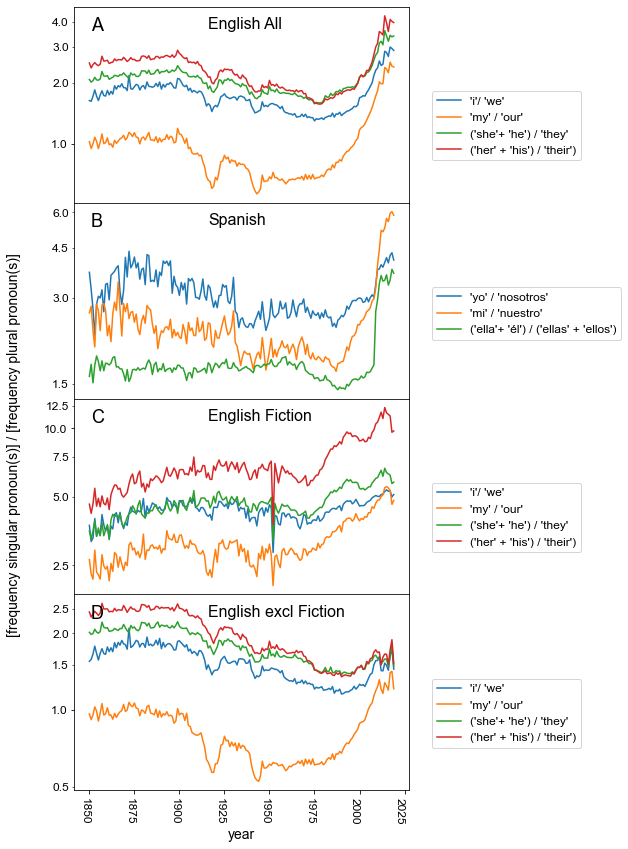

In [14]:
# Ratio scaled frequencies English All, Spanish, Fiction, Non-Fiction
section = 'Figures/main/'
corpora_plot = ['eng_all', 'sp', 'eng_fic', 'eng_excl_fic']
plot_diff_sing_plur_pronouns(section, 'scaled', corpora_plot)

### 2009 data

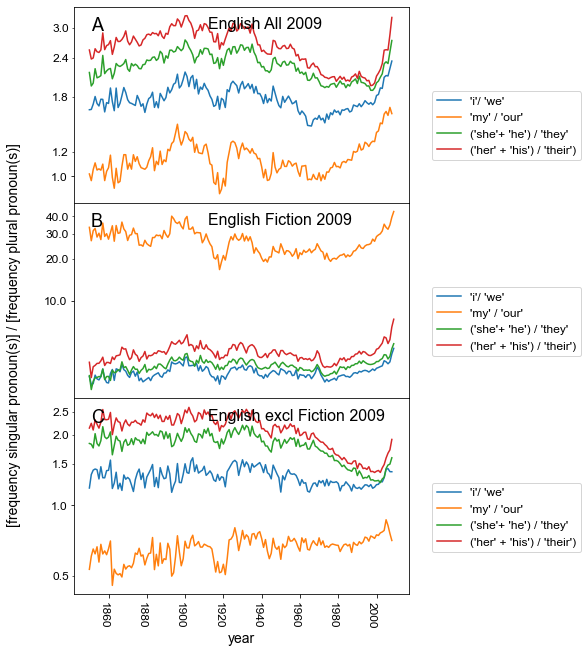

In [15]:
# Ratio scaled frequencies 2009 corpus
section = 'Figures/SI/'
corpora_plot = ['eng_all_2009', 'eng_fic_2009', 'eng_excl_fic_2009']
plot_diff_sing_plur_pronouns(section, 'scaled', corpora_plot)

## Rationality versus Intuition words

### Plot ratio between frequencies

In [16]:
def plot_Rat_vs_Int_freqs(section, corpora_plot):
    method = 'scaled'
    frows=len(corpora_plot)
    fcols=1
    fig, axs = plt.subplots(frows, fcols, figsize=(6*fcols,4*frows), sharex=True)
    print(axs)
    axi=0
    for corpus in corpora_plot:
        lan=categories['lan'][corpus]
        # Intuition words
        ts_Int=ts[corpus, method][[word for word in Intuition[lan] if word in ts[corpus, method].columns]]
        #re-order
        ts_Int=ts_Int.stack(0)
        ts_Int.name = 'freq'
        ts_Int=ts_Int.reset_index()

        # Rationality words
        ts_Rat=ts[corpus, method][[word for word in Rationality[lan] if word in ts[corpus, method].columns]]
        #re-order
        ts_Rat=ts_Rat.stack(0)
        ts_Rat.name = 'freq'
        ts_Rat=ts_Rat.reset_index()

        # Ratio between Rationality and Intuition words
        ax=axs[axi]
        ax.plot(ts_Rat.groupby('date').mean() / ts_Int.groupby('date').mean(), 'k')
        #ax.set_ylabel('ratio average rel frequencies')
        ax.set_xlabel('year', fontsize = 14)
        ax.set_yscale('log')
        
        ax.tick_params(axis='y', which='minor')
        ax.yaxis.set_minor_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(ticker.NullLocator())
        ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
        #ax.yaxis.set_major_formatter(FormatStrFormatter("%.2f"))

        # set title
        pad=10
        ax.annotate(categories['title'][corpus], xy=(0.2, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=16, ha='left', va='top')

        # set A, B, C etc to subplots
        ax.annotate(alfabet[axi], xy=(0.05, 0.95), xytext=(0, 0),
            xycoords='axes fraction', textcoords='offset points',
            fontsize=18, ha='left', va='top')
        
        axi=axi+1

    # place plots next to each other
    fig.subplots_adjust(hspace=0.0)
    # rotate x-axis ticks
    fig.autofmt_xdate(rotation=-90)
    # set common y-label
    fig.text(-0.02, 0.5, '[average frequency Rationality words] / [average frequency Intuition words]', 
             va='center', rotation='vertical', fontsize = 14)

    plt.savefig(section+'Rat_vs_Int_freqs_'+'_'.join(corpora_plot)+'.pdf', format='pdf', bbox_inches='tight')

### Figure 3 - main text

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]


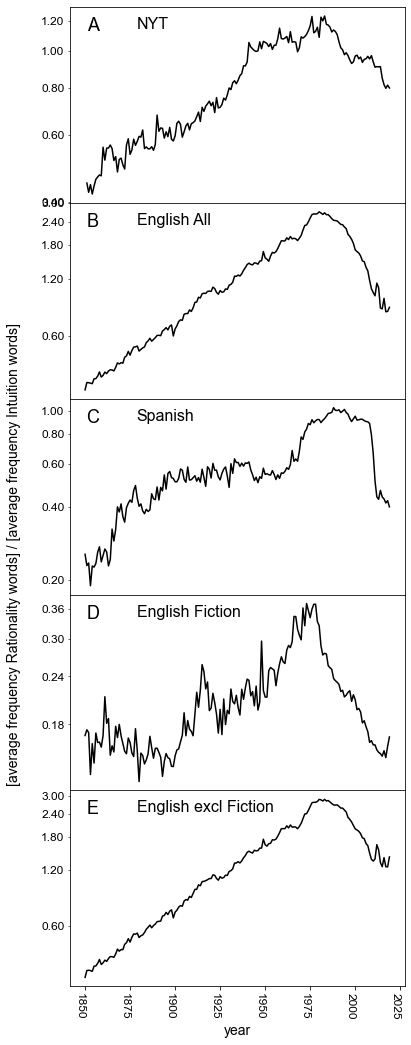

In [17]:
# Ratio freqs English All, Fiction, Non-Fiction, NYT
section = 'Figures/main/'
corpora_plot = ['NYT', 'eng_all','sp', 'eng_fic', 'eng_excl_fic' ]
plot_Rat_vs_Int_freqs(section, corpora_plot)

### 2009 data

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]


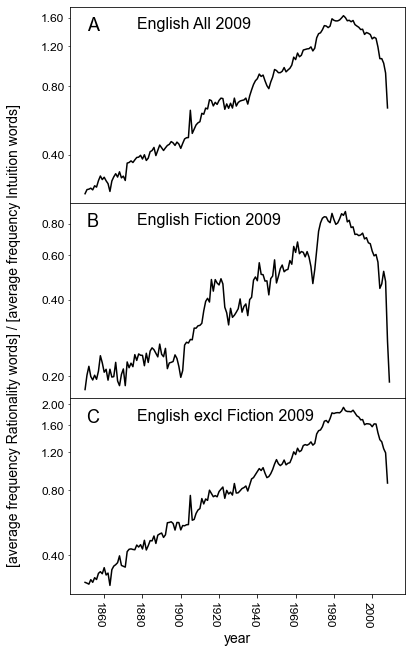

In [18]:
section = 'Figures/SI/'
corpora_plot = ['eng_all_2009', 'eng_fic_2009', 'eng_excl_fic_2009']
plot_Rat_vs_Int_freqs(section, corpora_plot)

## Word lists

### Table 1 - main text (1% word list)

In [19]:
corpus = 'eng_all'
method = 'z'
perc=0.01

In [20]:
def words_rise_fall_1980(corpus, method):
    lan = categories['lan'][corpus]
    # words rising after 1980 and declining before that year 
    after_1980 = ts[corpus, method][ts[corpus,method].index>1980]
    before_1980 = ts[corpus, method][ts[corpus,method].index<=1980]
    tau_after_1980 = after_1980.corrwith(after_1980.index.to_series(), method = 'kendall')
    tau_before_1980 = before_1980.corrwith(before_1980.index.to_series(), method = 'kendall')
    diff_tau= abs(tau_after_1980 - tau_before_1980)
    df_1980=pd.concat([tau_before_1980, tau_after_1980, diff_tau], axis=1, join= 'inner', 
                      keys=['tau_bef_1980', 'tau_aft_1980', 'diff_tau'])
    rf = df_1980[(df_1980['tau_bef_1980']>0) & (df_1980['tau_aft_1980']<-0)]
    fr = df_1980[(df_1980['tau_bef_1980']<-0) & (df_1980['tau_aft_1980']>0)]
    return rf, fr

In [21]:
rise_fall={}
fall_rise={}
corpora_wordlist = ['eng_all','sp', 'eng_fic', 'eng_excl_fic' ]
method = 'z'
for cat in corpora_wordlist:
    rise_fall[cat], fall_rise[cat] = words_rise_fall_1980(cat, method)

In [22]:
def print_words_PC_sent_Upattern(corpus, method, perc):
    nr_words = int(perc*5000)
    print(int(perc*100),'% words scoring highest on first PC axis (PC1):')
    print(*wordPCA[corpus, method].sort_values(by='PC1', ascending = False).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words scoring lowest on first PC axis (PC1):')
    print(*wordPCA[corpus, method].sort_values(by='PC1', ascending = True).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words scoring highest on surging PC axis (PC2):')
    print(*wordPCA[corpus, method].sort_values(by='PC2', ascending = False).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words scoring lowest on surging PC axis (PC2):')
    print(*wordPCA[corpus, method].sort_values(by='PC2', ascending = True).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words correlating most positively to sentiment:')
    corr_sent = ts[corpus, method].corrwith(tssent[corpus, method]['sent_pos'], axis = 0)
    corr_sent = corr_sent.sort_values(ascending = False)
    print(*corr_sent.sort_values(ascending = False).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words correlating most negatively to sentiment:')
    print(*corr_sent.sort_values(ascending = True).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words rising after 1980 and declining before that year:')
    print(*fall_rise[corpus].sort_values(by='diff_tau', ascending = False).head(nr_words).index, sep=', ')
    print('\n')
    print(int(perc*100),'% words rising before 1980 and declining after 1980:')
    print(*rise_fall[corpus].sort_values(by='diff_tau', ascending = False).head(nr_words).index, sep=', ')

In [23]:
print_words_PC_sent_Upattern(corpus, method, perc)

1 % words scoring highest on first PC axis (PC1):
laid, great, twelve, evidently, prove, upon, plain, mere, passing, alike, pass, very, nearly, character, sent, brought, doubt, thousand, civilized, without, same, hundred, wise, wit, intention, tide, sympathy, shore, being, useless, last, motive, habit, constantly, bore, bound, possession, cause, bark, town, hollow, executed, appearance, ground, impress, profession, ought, none, harmony, pure


1 % words scoring lowest on first PC axis (PC1):
develop, needs, presentation, including, product, university, adult, specifically, important, replace, international, suggest, directly, discuss, location, solve, between, use, cycle, scope, include, technically, background, depending, scored, testing, routine, physical, lethal, professional, travel, primary, ability, intact, involve, log, comment, pool, involved, status, table, logical, film, lack, individual, stress, formal, alpha, initial, recognize


1 % words scoring highest on surging PC axis

### SI 5 % words  - English All, Spanish, Fiction, Non-fiction

#### English All

In [24]:
corpus = 'eng_all'
method = 'z'
perc=0.05
print_words_PC_sent_Upattern(corpus, method, perc)

5 % words scoring highest on first PC axis (PC1):
laid, great, twelve, evidently, prove, upon, plain, mere, passing, alike, pass, very, nearly, character, sent, brought, doubt, thousand, civilized, without, same, hundred, wise, wit, intention, tide, sympathy, shore, being, useless, last, motive, habit, constantly, bore, bound, possession, cause, bark, town, hollow, executed, appearance, ground, impress, profession, ought, none, harmony, pure, opposite, altogether, worthless, hesitate, sides, unfortunate, fifty, cure, satisfied, belong, danger, drawn, against, brilliant, whole, near, nor, shade, difficulty, fatal, cast, hopeless, crown, attend, worthy, house, passage, bear, ox, kindly, seven, no, manner, every, superior, satisfaction, execution, declare, oath, acquaintance, forty, proof, succeed, proved, thrown, amusing, custom, regret, sum, twenty, crowded, quarrel, pleasant, fail, eight, beg, perfectly, poison, farther, widow, raised, cloth, usual, delicate, safely, whom, interfere, a

dressed, nights, beating, mad, forget, perfume, wore, delicious, crowd, dinner, took, sister, whispering, saw, hung, next, shut, bad, together, suddenly, slept, beside, thought, away, stood, another, awake, spoke, alive, drank, me, down, broke, dark, blame, inviting, whisper, drown, too, polite, moment, dragged, life, hang, quietly, forgot, glow, silence, footsteps, surprised, forehead, lose, laugh, lazy, lonely, shake, again, sit, stir, i, turning, body, silent, fool, tasted, steal, head, shout, forgetting, my, seeing, song, instead, sky, babe, wonder, loud, drink, herself, liar, tea, warm, surprise, bed, into, uncle, touched, mouth, cursed, neck, tore, then, cheek, gorgeous, gone, still, went, asleep, afraid, stole, oh, find, stairs, invite, threw, hint, breakfast, not, hurry, lived, gossip, left, night, naughty, drew, laughing, hanging, begging, tell, breathe, knife, gown, aunt, eyes, pillow, always, calling, mother, pause, worse, suspicious, sink, forever, shadow, conversation, her

In [25]:
corpus = 'sp'
method = 'z'
perc=0.05
print_words_PC_sent_Upattern(corpus, method, perc)

5 % words scoring highest on first PC axis (PC1):
virtud, cuyo, causa, cuya, por, cuyos, consiguiente, hechas, hacerse, formado, haberse, halla, cualquiera, dará, misma, cuyas, efecto, recibido, formar, cuanto, conveniente, decirse, mismas, merece, siendo, seguida, leyes, iguales, inútil, conservar, proceder, empeño, impedir, adquirido, partes, alguno, dar, contra, estando, ocupar, quedando, el, teniendo, objeto, al, órdenes, basta, podido, nombre, ocho, presentarse, han, seis, notable, verdadera, servido, separado, particulares, preciso, vista, verdaderamente, inmensa, dé, harán, dueño, aviso, esta, obligado, cuantos, sabido, dando, verdadero, todas, hayan, palacio, honor, cuatro, primero, tomado, graves, hecha, guarda, haya, pues, cual, circunstancias, mismo, ellas, servir, serlo, forman, quiera, notables, formando, fortuna, inmediatamente, llevando, mismos, tesoro, tercero, defectos, último, vienen, causas, formada, entera, haber, ramos, regla, nombrado, justicia, paga, doce, frutos

mejor, ojos, humo, tristeza, rostro, vi, silencio, mirar, llorar, habló, risa, cansancio, unos, manos, rabia, sienta, miraba, curiosidad, prisa, loca, hablaba, suave, voz, mirando, metido, dormido, regalo, tu, desnudo, vestido, siguió, tú, iba, demasiado, noches, muerta, nunca, roto, olvidado, tus, duro, eres, rato, aire, ves, pero, llegaba, soy, pequeño, gritos, apenas, verla, haces, te, bueno, echó, boca, has, detuvo, sentir, desconocido, conmigo, unas, noche, mí, vueltas, quiero, sorpresa, alegría, rodillas, ti, labios, todavía, pensaba, amiga, brazos, puerta, ventanas, habilidad, pensado, hombros, beber, ir, oreja, sentarse, cristal, mentira, dormir, sentado, hora, acercarse, bajó, sí, juntos, volvió, peligroso, llevo, leve, cena, caer, corriendo, dices, esperaba, lanzó, lejos, gracias, quieres, volver, hablar, encontró, casi, perro, nadie, nada, qué, suena, contigo, luz, irse, cama, brazo, suelo, dedos, pasos, dispuesta, vivir, entonces, empezaba, cabeza, sabes, garganta, llevaba,

In [26]:
corpus = 'eng_fic'
method = 'z'
perc=0.05
print_words_PC_sent_Upattern(corpus, method, perc)

5 % words scoring highest on first PC axis (PC1):
picked, moving, worked, anyway, upset, empty, stayed, nightmare, tiny, crazy, older, climbing, edge, bother, pick, anyone, finally, banging, shiny, handle, sticky, cooking, across, sweat, outside, crawl, worry, talking, split, somewhere, car, start, smell, about, lot, stopped, biggest, backing, decided, mirror, desperately, cream, kid, upside, restaurant, driving, bowl, tried, telling, damn, stuck, desk, top, waiting, bedroom, floor, overnight, working, halfway, nasty, staring, hell, frozen, blanket, toward, get, woke, driver, leg, slightly, cracked, swim, trying, somehow, lined, wearing, wet, explain, happening, finished, pool, climb, skirt, glasses, worried, racing, birthday, drive, risky, killing, past, lunch, eating, crack, running, happen, chicken, cat, stuffed, try, twisted, belt, tonight, pad, confusing, jump, stays, kitchen, dump, behind, like, cover, stuff, smelled, watching, run, ceiling, switched, handful, watched, siren, nos

lost, hear, wear, while, his, when, never, lose, deep, fast, let, turning, make, now, take, loud, pair, how, light, looks, but, forget, path, if, seen, believe, hand, arms, taking, surprise, enough, walk, find, breaking, rest, shake, knowing, left, to, seat, toss, sofa, her, rushing, threw, surprised, raised, long, calling, throw, leaving, blood, hoped, pointing, laughing, melt, worse, gave, covered, piece, hang, few, look, set, step, him, here, i, break, gather, bring, arm, struggling, falling, cheek, suspected, comfortable, forward, at, mind, think, together, me, no, call, leave, angry, thanks, stairs, enjoy, burning, begging, blame, couch, dressed, wanting, ride, awake, stepping, breathe, sending, head, grateful, remind, looking, pillow, filled, alone, morning, quiet, close, hold, better, tongue, fill, reach, pain, breeze, ready, catching, instead, toast, smile, easy, turn, distracted, tasted, stopping, whisper, sure, feeling, keeping, next, seeing, forehead, chose, keep, relieved, 

In [27]:
corpus = 'eng_excl_fic'
method = 'z'
perc=0.05
print_words_PC_sent_Upattern(corpus, method, perc)

5 % words scoring highest on first PC axis (PC1):
laid, great, useless, evidently, crowded, evening, twelve, sent, prove, very, mere, alike, much, brought, doubt, passing, pass, upon, little, before, broken, hesitate, excuse, hopeless, without, head, shade, plain, wise, brilliant, character, safely, habit, thousand, civilized, returned, so, place, faint, impress, blow, filled, sympathy, regret, nearly, hundred, wit, same, worn, tide, gave, opposite, pale, it, intention, lying, raised, settle, being, bare, bear, bent, hollow, lie, day, profession, lad, town, poison, bore, constantly, man, fellow, executed, perfectly, nothing, worthless, cause, appearance, bound, spoiled, exhausted, motive, owe, possession, shore, last, soon, every, struck, but, delicate, pleasant, lay, against, belong, all, thrown, bark, surely, round, leaving, shining, amusing, ladies, none, sides, cottage, altogether, disturb, burning, whole, horse, he, fancy, now, rubbish, superior, ought, true, moonlight, throw, and

alive, watch, life, delicious, hair, watched, beating, drove, crowd, knew, lazy, sky, sat, hang, dawn, nights, inviting, hanging, knocking, hide, liar, silly, journey, lived, blew, rang, sit, wait, teach, another, tell, together, body, told, drink, dressed, beat, forgetting, scent, pudding, blame, forget, bad, mother, she, laughing, breath, singing, divide, mystery, sitting, lose, next, shook, seeing, suffering, clothes, laugh, asleep, enjoying, me, suspicious, mad, kiss, couch, breakfast, gather, gossip, find, smiling, smile, polite, steal, when, gently, discover, always, turned, else, my, sometimes, sister, away, wealth, ugly, lonely, ran, whispering, awake, shake, humanity, wore, afraid, invite, ride, endless, saw, drown, draw, perfume, door, understood, devil, calling, dinner, shadow, passionate, face, ancestors, what, poop, forever, worse, friendly, dragged, beyond, thirsty, yell, grew, love, go, thanksgiving, loving, off, intimate, tore, shout, took, breathe, left, down, word, in

## Google Trends

### Comparison of word use in book language and in Google searches for the period 2004-2019

In [28]:
def plot_GT_null_model(section, corpora_ng, corpora_GT):
    method = 'z'
    frows=len(corpora_ng)
    fcols=1
    fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,4*frows))#, sharex=True)

    # Plot difference with null-model 
    ax_col=0
    with open('bootstrap_matrix.pkl', 'rb') as f:
        bootstrap_matrix = pickle.load(f)
    df_corr = pd.read_pickle('corr_coeff_ngrams_GT.pkl')
    i=0
    for GTcat, cat in zip(corpora_GT, corpora_ng):
            lan=categories['lan'][GTcat]
            bins=np.linspace(-1,1,50)
            # make bins for correlation coefficients data
            corr_bins_data=pd.cut(df_corr[cat,method].corrcoeff.to_list(), bins=bins).value_counts()
            corr_bins_data_arr = np.array(corr_bins_data)
            # make bins for bootstrap data: calculate mean, 5% percentile, and 95% percentile
            corr_bins_bootstrap=[]
            for k in range(len(bootstrap_matrix[cat])):
                corr_bins_bootstrap.append(pd.cut(bootstrap_matrix[cat][k], bins=bins).value_counts())
            count_mean = np.mean(corr_bins_bootstrap, axis=0)
            count_perc5= np.percentile(corr_bins_bootstrap, axis=0, q=5)
            count_perc95= np.percentile(corr_bins_bootstrap, axis=0, q=95)
            # calculate difference between data and mean of bootstrapped data
            diff_corr= [b_i - a_i for a_i, b_i in zip(count_mean, corr_bins_data_arr)]
            ax=axs[i]
            # plot 5% and 95% percentiles of bootstrapped data, and diff_corr
            ax.bar(bins[0:-1], diff_corr, width= bins[1]-bins[0], align='edge', edgecolor='white')
            ax.bar(bins[0:-1], np.zeros(len(count_mean)), width= bins[1]-bins[0], align='edge', alpha = 0.5,
                    yerr=[count_mean - count_perc5, count_perc95 - count_mean])
            #axs[i, ax_col].set(xlabel='Spearmans rank correlation coefficient')
            ax.set(xlabel=None)
            #axs[i, ax_col].set(ylabel='Frequency pairwise words -\n frequency null model')
            ax.set(xlabel=None)
            #axs[i, ax_col].axes.yaxis.set_ticks([])
            ax.set_xlabel('Spearmans rank correlation coefficient', fontsize=14)
            #ax.set_ylabel('[frequency pairwise words] - [frequency null model]')
            # set title
            pad=10
            ax.annotate(categories['title'][cat], xy=(0.2, 0.95), xytext=(0, 0),
                        xycoords='axes fraction', textcoords='offset points',
                        fontsize=16, ha='left', va='top')

            # set A, B, C etc to subplots
            ax.annotate(alfabet[i], xy=(0.05, 0.95), xytext=(0, 0),
                xycoords='axes fraction', textcoords='offset points',
                fontsize=18, ha='left', va='top')
            
            i=i+1
    
    #set common y-label
    fig.text(-0.03, 0.5, '[frequency pairwise words] - [average frequency null model]', 
             va='center', rotation='vertical', fontsize = 14, fontweight='light')
    # place plots next to each other
    fig.subplots_adjust(hspace=0)
    #fig.subplots_adjust(wspace=0.8)
    # rotate x-axis ticks
    fig.autofmt_xdate(rotation=-90)

    plt.tight_layout
    plt.savefig(section + 'GT_dynamics'+'_'.join(corpora_plot)+'.pdf', format='pdf', bbox_inches='tight')


### Figure 4 - main text

EOFError: Ran out of input

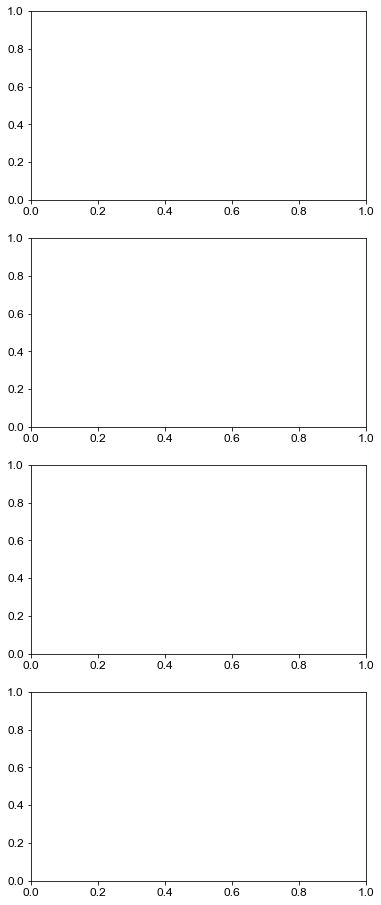

In [29]:
# Google Trends analysis English All, Spanish, Fiction, Non-Fiction
section = 'Figures/main/'
corpora_ngrams = ['eng_all', 'sp', 'eng_fic', 'eng_excl_fic']
corpora_GT = ['GT_eng_all', 'GT_sp', 'GT_eng_all', 'GT_eng_all']
plot_GT_null_model(section, corpora_ngrams, corpora_GT)

## Other figures SI

In [ ]:
section = 'Figures/SI/'

### All Principal components English, Spanish, English Fiction, English excl Fiction

In [ ]:
def plot_PC1_PC2(method, categories, languages, PC_dir, titles):
    row_titles = titles
    frows=len(row_titles)
    col_titles = ['PC1', 'PC2']
    fcols=2
    
    fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,6*frows), sharex=True)

    # Plot relevant Principal component
    for i, (cat, lan, PCdir) in enumerate(zip(categories, languages, PC_dir[0])):
        axs[i, 0].plot(tsPCA[cat, method]['PC1']*PCdir, '-k', linewidth=1.5)
        #axs[i, 0].axes.yaxis.set_ticks([])
        axs[i, 0].set_xlabel('year', fontsize=16)
        
    for i, (cat, lan, PCdir) in enumerate(zip(categories, languages, PC_dir[1])):
        axs[i, 1].plot(tsPCA[cat, method]['PC2']*PCdir, '-k', linewidth=1.5)
        #axs[i, 1].axes.yaxis.set_ticks([])
        axs[i, 1].set_xlabel('year', fontsize=16)


    # set titles to columns and rows
    pad = 10 # in points
    for ax, col in zip(axs[0], col_titles):
        ax.annotate(col, xy=(0.5, 1), xytext=(0, pad),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=18, ha='center', va='baseline')
    for ax, row in zip(axs[:,0], row_titles):
        ax.annotate(row, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    fontsize=18, ha='right', va='center')

    # set A, B, C etc to subplots
    i=0
    for ax1 in axs:
        for ax in ax1:
            ax.annotate(alfabet[i], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=20, ha='left', va='top')
            i=i+1

    # place plots next to each other
    fig.subplots_adjust(hspace=0)
    #fig.subplots_adjust(wspace=0)
    # rotate x-axis ticks
    fig.autofmt_xdate(rotation=-90)


In [ ]:
method = 'z'
corpora_plot = ['eng_all','sp', 'eng_fic', 'eng_excl_fic']
PC_dir = [[1,1,-1,1],[1,1,1,1]]
plot_PC1_PC2(method, corpora_plot, categories['lan'][corpora_plot].tolist(), PC_dir, categories['title'][corpora_plot].tolist())
plt.savefig(section+'PC1_PC2'+'_'.join(corpora_plot)+'.pdf', format='pdf', bbox_inches='tight')

#### Explained variance

In [ ]:
method='z'
corpora_plot = ['eng_all','sp', 'eng_fic', 'eng_excl_fic']
for cat in corpora_plot:
    print(cat, 'PC1', PCA_expl_var[cat,method][0])
    print(cat, 'PC1', PCA_expl_var[cat,method][1])


### Correlations between PC -axes and sentiment

In [ ]:
method='z'

corpora_plot = ['eng_all','sp', 'eng_fic', 'eng_excl_fic']
for cat in corpora_plot:
    print(cat)
    print('corr PC2 vs. pos sent:',st.spearmanr(tsPCA[cat,method].PC2,tssent[cat,method].sent_pos)[0], '\n',
          'corr PC2 vs. neg sent:',st.spearmanr(tsPCA[cat,method].PC2,tssent[cat,method].sent_neg)[0], '\n',
          'corr PC2 vs. arousal:',st.spearmanr(tsPCA[cat,method].PC2,tssent[cat,method].sent_aro)[0])
    
"""
print('corr PC1 vs. pos sent:',scipy.stats.spearmanr(tsPCA[cat,method].PC1,tssent[cat,method].sent_pos), '\n',
          'corr PC1 vs. neg sent:',scipy.stats.spearmanr(tsPCA[cat,method].PC1,tssent[cat,method].sent_neg), '\n',
          'corr PC1 vs. arousal:',scipy.stats.spearmanr(tsPCA[cat,method].PC1,tssent[cat,method].sent_aro))
"""

### Flag words

#### ngrams - personal

In [ ]:
# PLOT personal categories ngrams

def plot_personal_flagwords(corpora_plot, method):
    for cat in corpora_plot:
        print(cat)
        lan = categories['lan'][cat]
        method = 'z'
        fcols= 1
        wordcats = S1[lan].keys()
        frows=len(wordcats)
        fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,4*frows), sharex=True)
        cm = plt.get_cmap('rainbow')

        # loop through word categories S1: 
        for i, wordcat in enumerate(wordcats):
            S=[word for word in S1[lan][wordcat] if word in ts[cat,method].columns]
            axs[i].set_prop_cycle(cycler(color=[cm(1.*i/len(S)) for i in range(len(S))]))
            axs[i].plot(ts[cat, method][S], alpha=0.7)
            axs[i].plot(ts[cat, method][S].mean(axis=1), 'k--')
            axs[i].set_ylabel('z-score')
            axs[i].legend(S, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2,fontsize=8)
            axs[i].annotate(wordcat, xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=16, ha='left', va='top')


        # place plots next to each other
        fig.subplots_adjust(hspace=0)
        # rotate x-axis ticks
        fig.autofmt_xdate(rotation=-90)
        plt.savefig(section+'ngrams_wordcats_pers_'+cat+'.pdf', format='pdf', bbox_inches='tight')

In [ ]:
flagwords_titles=['science and technology', 'quantification', 'business and economy', 'social organization', 'time and place']
def plot_society_flagwords(corpora_plot, method):
    for cat in corpora_plot:
        print(cat)
        lan = categories['lan'][cat]
        method = 'z'
        fcols= 1
        wordcats = S2[lan].keys()
        frows=len(wordcats)
        fig, axs = plt.subplots(frows,fcols, figsize=(6*fcols,4*frows), sharex=True)
        cm = plt.get_cmap('rainbow')

        # loop through word categories S2: 
        for i, wordcat in enumerate(wordcats):
            S=[word for word in S2[lan][wordcat] if word in ts[cat,method].columns]
            axs[i].set_prop_cycle(cycler(color=[cm(1.*i/len(S)) for i in range(len(S))]))
            axs[i].plot(ts[cat, method][S], alpha=0.7)
            axs[i].plot(ts[cat, method][S].mean(axis=1), 'k--')
            axs[i].set_ylabel('z-score')
            axs[i].legend(S, bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2,fontsize=8)
            axs[i].annotate(flagwords_titles[i], xy=(0.05, 0.95), xytext=(0, 0),
                    xycoords='axes fraction', textcoords='offset points',
                    fontsize=16, ha='left', va='top')


        # place plots next to each other
        fig.subplots_adjust(hspace=0)
        # rotate x-axis ticks
        fig.autofmt_xdate(rotation=-90)
        plt.savefig(section+'ngrams_wordcats_pers_'+cat+'.pdf', format='pdf', bbox_inches='tight')

In [ ]:
# English all 
method='z'
corpora_plot = ['eng_all']
plot_personal_flagwords(corpora_plot, method)

In [ ]:
corpora_plot = ['eng_all']
plot_society_flagwords(corpora_plot, method)

In [ ]:
# Spanish
corpora_plot = ['sp']
plot_personal_flagwords(corpora_plot, method)

In [ ]:
# Spanish
corpora_plot = ['sp']
plot_society_flagwords(corpora_plot, method)

In [ ]:
# English Fiction
corpora_plot = ['eng_fic']
plot_personal_flagwords(corpora_plot, method)

In [ ]:
# English Fiction
corpora_plot = ['eng_fic']
plot_society_flagwords(corpora_plot, method)

In [ ]:
# English excl Fiction
corpora_plot = ['eng_excl_fic']
plot_personal_flagwords(corpora_plot, method)

In [ ]:
corpora_plot = ['eng_excl_fic']
plot_society_flagwords(corpora_plot, method)

#### NYT

In [ ]:
method='z'
corpora_plot = ['NYT']
plot_personal_flagwords(corpora_plot, method)

In [ ]:
corpora_plot = ['NYT']
plot_society_flagwords(corpora_plot, method)